<a href="https://colab.research.google.com/github/raichalvarghese/Data_Science_Lab/blob/master/naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How Naive Bayes algorithm works?
Let’s understand it using an example. Below I have a training data set of weather and corresponding target variable ‘Play’ (suggesting possibilities of playing). Now, we need to classify whether players will play or not based on weather condition. Let’s follow the below steps to perform it.

Step 1: Convert the data set into a frequency table

Step 2: Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.

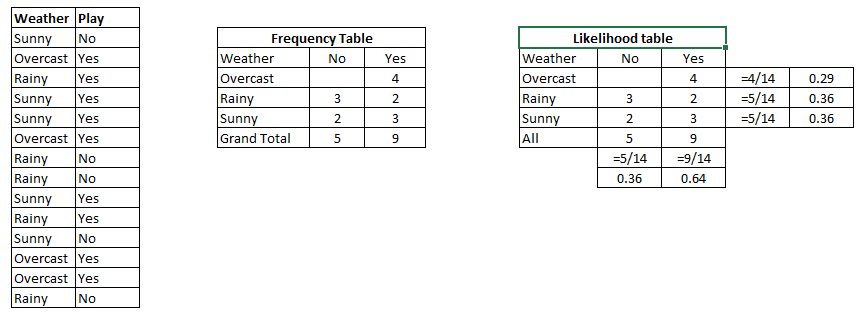

Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

Problem: Players will play if weather is sunny. Is this statement is correct?

We can solve it using above discussed method of posterior probability.

P(Yes | Sunny) = P( Sunny | Yes) * P(Yes) / P (Sunny)

Here we have P (Sunny |Yes) = 3/9 = 0.33, P(Sunny) = 5/14 = 0.36, P( Yes)= 9/14 = 0.64

Now, P (Yes | Sunny) = 0.33 * 0.64 / 0.36 = 0.60, which has higher probability.

Naive Bayes uses a similar method to predict the probability of different class based on various attributes. This algorithm is mostly used in text classification and with problems having multiple classes.



##Applications of Naive Bayes Algorithms
Real time Prediction: Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.

Multi class Prediction: This algorithm is also well known for multi class prediction feature. Here we can predict the probability of multiple classes of target variable.

Text classification/ Spam Filtering/ Sentiment Analysis: Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)


Recommendation System: Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not
 

##TYPES OF NAIVE BAYES MODEL

MultinomialNB: good for when your features(categorical or continuous) describe discrete frequency counts.

BernoulliNB: good for making predictions from binary features.

GaussianNB: Good for making predictions from normally distributed features.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('/content/sample_data/Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(dataset.drop('Species',axis=1))

StandardScaler()

In [ ]:
scaled_features=scaler.transform(dataset.drop('Species',axis=1))

In [ ]:
new_dataset=pd.DataFrame(scaled_features,columns=dataset.columns[:-1])

In [ ]:
new_dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...,...
145,1.628164,1.038005,-0.124958,0.819624,1.447956
146,1.651258,0.553333,-1.281972,0.705893,0.922064
147,1.674353,0.795669,-0.124958,0.819624,1.053537
148,1.697448,0.432165,0.800654,0.933356,1.447956


In [ ]:
from sklearn.model_selection import train_test_split
X=new_dataset
y=dataset['Species']

In [ ]:
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
scores = []
#GuassianNB
#Guassian Naive Bayes is used in cases when all our features are cases are continuous
#its features can have different values in data set as width and length can vary

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
scores.append(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm 

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [ ]:
print(scores)

[1.0]


In [ ]:

classifier1 = BernoulliNB()
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test) 
scores.append(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 0,  9,  4],
       [ 0,  1, 12]])

In [ ]:
print(scores)

[1.0, 0.8888888888888888]
